Essayez avant tout de bien comprendre la première partie. Certains points abordés ici serviront très peu ou seront abordés pendant l'année.

In [1]:
"""On importe les bibliothèques scientifiques car elles seront utilisées ensuite"""
import numpy as np
import matplotlib.pyplot as plt


```{tip}
L'ordre des parties va du plus important au moins important.

```

(erreurs)=
# Comprendre ses erreurs

Quand on écrit du code, on fait des erreurs. Ca arrive à tout le monde. Il y a deux types d'erreurs :
* Les erreurs qui empêchent le code de s'exécuter correctement : Python renvoie alors un message d'erreur.
* Les erreurs qui n'empêchent pas le code de s'exécuter mais qui font que le programme ne renvoie pas ce qui est attendu.

## Python et les messages d'erreurs.

### Exemple basique

Lorsqu'un script bute sur un erreur d'exécution. Python affiche un message :

In [2]:
L1 = np.array([1, 2, 3])
L2 = np.array([1, 2])

L3 = L1 + L2

a = 3 * 4

print(L3)


ValueError: operands could not be broadcast together with shapes (3,) (2,) 

Pour comprendre et corriger son erreur, deux points sont importants :
* L'endroit où l'erreur a été commise : ici `----> 6 L3 = L1 + L2`. C'est à la ligne 6.
* Le message d'erreur : `ValueError: operands could not be broadcast together with shapes (3,) (2,) `. Avec un peu de connaissance en anglais, on comprend que les deux vecteurs numpy n'ont pas la même taille (shape) et qu'on ne peut donc pas les sommer.

Dans la majorité des cas, ces deux éléments vont permettront de comprendre votre erreur.

### Le cas d'erreur dans une fonction
Il arrive que certaines erreurs se trouvent dans une fonction. Le message d'erreur est alors un peu plus compliqué :

In [3]:
def x_carre(x):
  return x ** 2

a = "r"

b = x_carre(a)

print(b)


TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

Ici, Python signale deux endroits où il y a une erreur. L'explication est simple : ici le message est assez clair, l'opérateur puissance (`**`) ne peut s'appliquer entre une chaine de caractère `str` et un entier `int` (logique !!). Sauf que cette erreur se produit dans une fonction (`x_carre`). Python signale alors :
* l'endroit où la fonction a été appelée `b = x_carre(a)`
* l'endroit _dans la fonction_ à l'erreur a été déclenchée (`return x ** 2`)

A vous de savoir si le problème est la définition de la fonction ou la manière de l'appeler. Ici c'est vraisemblablement la manière de l'appeler car on ne devrait pas chercher à calculer le carré d'une chaine de caractère !

Ce système est très efficace mais peut dérouter, surtout quand on utilise des fonctions déjà existantes qui sont souvent imbriquées. Un exemple ci-dessous.

ValueError: x and y must have same first dimension, but have shapes (3,) and (2,)

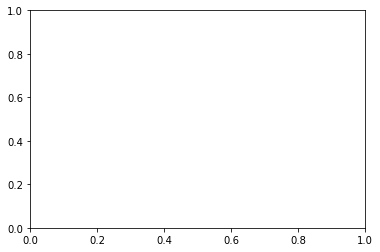

In [4]:
L1 = np.array([1, 2, 3])
L2 = np.array([1, 2])

f, ax = plt.subplots()
ax.plot(L1, L2)


Pour corriger son erreur, il faut :
* garder son calme !
* chercher le message d'erreur (ici `ValueError: x and y must have same first dimension, but have shapes (3,) and (2,)`)
* chercher la partie du message d'erreur qui point vers __votre code__ (on peut raisonnablement penser qu'il n'y a pas d'erreurs dans les fonctions des bibliothèques officielles). Ici `ax.plot(L1, L2)` : `L1` et `L2` n'ont pas la même taille, c'est là le problème.

### Les parenthèses...
Lorsqu'on écrit une formule un peu trop grosse, il arrive qu'on oublie de fermer une parenthèse.

In [5]:
u1 = 1
u2 = 0.1
v1 = 15
v2 = 14
a = v1 / v2
ua = a * np.sqrt((u1 / v1) ** 2 + (u2 / v2) ** 2



print(ua)


SyntaxError: invalid syntax (<ipython-input-5-8048891cc3a0>, line 10)

Problèmes :
* le message est peu verbeux (syntaxe invalide)
* la ligne pointé par le message n'est pas la ligne où il y a une erreur !

En effet, Python  ne se rend compte du problème de parenthèse mal fermée que lorsqu'il arrive sur une nouvelle instruction. C'est pourquoi, __en cas d'erreur de syntaxe invalide, pensez aussi à vérifier l'écriture des lignes _au dessus_ de l'endroit signalé par le message d'erreur.__

## Pas d'erreur mais...
```{attention}
Ce n'est pas parce que l'interpréteur Python ne renvoie pas une erreur que votre programme est bon. Il peut faire des calculs et renvoyer des valeurs __qui ne sont pas celles recherchées.__
```

```{tip} 
__Prenez l'habitude de tester votre code sur des cas simples où vous connaissez les valeurs de retours attendues pour vérifier que votre programme fait bien ce qui est demandé (éviter les cas particuliers).__
```

# La fonction numpy.polyfit

Il arrive fréquemment qu'on veuille ajuster un modèle théorique sur des points de données expérimentaux. Le plus courramment utilisé pour non est l'ajustement d'un modèle affine $y = ax + b$ à des points expérimentaux $(x_i, y_i)$ (i allant de 1 à  N). On veut connaître les valeurs de $a$ et $b$ qui donne une droite passant au plus près des points expérimentaux.

On ne va pas présenter ici ce que signifie "au plus près", ni comment sont déterminer les coefficients $a$ et $b$. On présente juste une fonction (`polyfit`) de la bibliothèque `numpy` qui permet justement de réaliser cet ajustement (on parle de __régression linéaire__).

```{note}
`polyfit` permet de réaliser un ajustement par un polynôme de degré `n` quelconque. On se limitera ici à $n=1$ soit une droite.
```

## La syntaxe

On dispose de deux vecteurs numpy (ou listes classiques) contenant les $x_i$ (variable `xi`) et les $y_i$ (variable `yi`) expérimentaux. On écrit :

```python
p = polyfit(xi, yi, n)  # n est le degré du polynôme d'ajustement donc pour nous n=1

```

```{margin}
`polyfit` permet de réaliser un ajustement par un polynôme de degré `n` quelconque. On se limitera ici à $n=1$ soit une droite.
```

`p` est un vecteur numpy contenant les coefficients du polynôme par ordre de puissance décroissante. Ainsi pour :

```python
p = polyfit(xi, yi, 1)  # n est le degré du polynôme d'ajustement donc pour nous n=1
```

`p` contient : `[a, b]` avec comme modèle : `y = ax + b`. On y accède par : `p[0]` (pente) et `p[1]` (ordonnée à l'origine).

## Un exemple

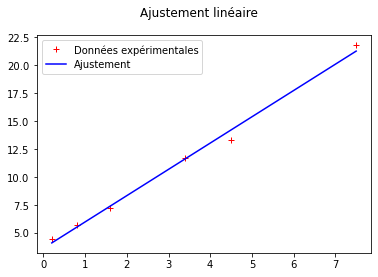

In [6]:
""" Fausses (!) données expérimentales """
xi = np.array([0.2, 0.8, 1.6, 3.4, 4.5, 7.5])
yi = np.array([4.4, 5.7, 7.2, 11.7, 13.3, 21.8])

"""Ajustement linéaire"""
p = np.polyfit(xi, yi, 1)
y_adj = p[0] * xi + p[1]  # On applique la droite ajusté aux xi pour comparaison.


f, ax = plt.subplots()
f.suptitle("Ajustement linéaire")

ax.plot(xi, yi, marker='+', label='Données expérimentales', linestyle='', color='red')  # On voit l'intérêt des options
ax.plot(xi, y_adj, marker='', label='Ajustement', linestyle='-', color='blue')  # On voit l'intérêt des options

ax.legend()


(tableau_numpy)=
# Tableaux numpy : manipulations

## Opérations usuelles et concaténation
* Les opérations usuelles et fonctions mathématiques présentées précédemment s'appliquent à nouveau pour les tableaux numpy.
* Concaténation : La fonction `append` doit prendre un troisième argument si on concatène deux tableaux (ou un tableau et un vecteur). L'argument `axis = `:
    * `axis = 0` : Concaténer _verticalement_ : les deux tableaux doivent donc avec le même nombre de colonnes. Sinon Python renverra une erreur.
    * `axis = 1` : Concaténer _horizontalement_ : les deux tableaux doivent donc avec le même nombre de lignes. Sinon Python renverra une erreur.
    * Pas de `axis` : Python va transformer les tableaux en vecteurs et concaténer les vecteurs.

In [7]:
L1 = np.array([[2.3, 2.5], [3.14, 3.16], [3.14, 4.17]])
L2 = np.array([[1.2, 3.7], [4.2, 3.1]])

L3 = np.append(L1, L2)  # On aplatit les tableaux pour obtenir un vecteur.
print(L3)

L4 = np.append(L1, L2, axis=0)  # On place L2 sous L1
print(L4)

L5 = np.append(L1, L2, axis=1)  # Renvoie un erreur car on ne peut placer L2 à droite de L1 : pas le même nombre de lignes
print(L5)

[2.3  2.5  3.14 3.16 3.14 4.17 1.2  3.7  4.2  3.1 ]
[[2.3  2.5 ]
 [3.14 3.16]
 [3.14 4.17]
 [1.2  3.7 ]
 [4.2  3.1 ]]


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3 and the array at index 1 has size 2

## Sélection d'une partie d'un tableau.
```{attention}
* La méthode présentée ne fonctionne pas avec une liste de listes classique. Uniquement avec des tableaux `numpy`
* Attention, l'__indexation commence toujours à 0__
```

### Sélection d'un élément.

In [8]:
L1 = np.array([[2.3, 2.5], [3.14, 3.16], [3.14, 4.17]])
print(L1[2, 1])
"""
2 : sélection de la troisième ligne
1 : sélection de la deuxième colonne

On affiche donc 4.17
"""

4.17


'\n2 : sélection de la troisième ligne\n1 : sélection de la deuxième colonne\n\nOn affiche donc 4.17\n'

### Sélection d'une portion d'un tableau
```{margin}
On rappelle que L1[1:3] sélectionne jusqu'à l'index 3 (quatrième élément ) __non inclus__.
```

In [9]:
L1 = np.array([[2.3, 2.5, 6.8], [3.14, 3.16, -1.3], [3.14, 4.17, 3.45], [1.6, 4.2,  -8.2]])
print("Première sélection", L1[0:2, 1:3])  # Sélection des deux premières lignes (0 et 1) et colonnes d'index (1 et 2). C'est un tableau.
print("Deuxième sélection", L1[:, 1])  # Permet de sélectionner la deuxième colonne en entier (c'est un vecteur)
print("Troisième sélection", L1[1, :])  # Permet de sélectionner la deuxième ligne en entier (c'est un vecteur)
print("Quatrième sélection", L1[1])  # Permet de sélectionner la deuxième ligne en entier aussi (c'est un vecteur)
print("Cinquième sélection", L1[-1, :])  # Permet de sélectionner la dernière ligne en entier (c'est un vecteur)

Première sélection [[ 2.5   6.8 ]
 [ 3.16 -1.3 ]]
Deuxième sélection [2.5  3.16 4.17 4.2 ]
Troisième sélection [ 3.14  3.16 -1.3 ]
Quatrième sélection [ 3.14  3.16 -1.3 ]
Cinquième sélection [ 1.6  4.2 -8.2]


Voici le tableau `L1` avec les indices des lignes et colonnes pour mieux comprendre.

![Tableau numpy 2](./images/tableau_2.png)

## Si j'ai bien compris...
```{admonition} Exercice
:class: tip
Essayer de prévoir ce qu'affichera chaque `print` puis observer le résultat en cliquant sur la croix en bas à droite.
```

In [10]:
L1 = np.arange(0, 4)
L2 = L1 * L1
L3 = np.ones(4)

"""
Ci-dessous : une méthode pour créer un tableau à partir de 3 vecteurs de même taille.
Les L1, L2, L3 sont les lignes du tableau.
"""
M1 = np.array([L1, L2, L3])

print("Cas 1 :", M1)
print("Cas 2 :", M1[2, 3])
print("Cas 3 :", M1[-1, 2])
print("Cas 4 :", M1[1])
print("Cas 5 :", M1[2, :])
print("Cas 6 :", M1[:, -1])
print("Cas 7 :", M1[:, -2])
print("Cas 8 :", M1[1:2, 0:1])
print("Cas 9 :", M1[:-1, 1])  # Un peu plus compliqué...
print("Cas 10 :", M1[-3:-1, -3:3])  # On se concentre bien...

Cas 1 : [[0. 1. 2. 3.]
 [0. 1. 4. 9.]
 [1. 1. 1. 1.]]
Cas 2 : 1.0
Cas 3 : 1.0
Cas 4 : [0. 1. 4. 9.]
Cas 5 : [1. 1. 1. 1.]
Cas 6 : [3. 9. 1.]
Cas 7 : [2. 4. 1.]
Cas 8 : [[0.]]
Cas 9 : [1. 1.]
Cas 10 : [[1. 2.]
 [1. 4.]]


In [11]:
from myst_nb import glue

L1 = np.arange(0, 4)
L2 = L1 * L1
L3 = np.ones(4)

"""
Ci-dessous : une méthode pour créer un tableau à partir de 3 vecteurs de même taille.
Les L1, L2, L3 sont les lignes du tableau.
"""
M1 = np.array([L1, L2, L3])

glue("cas_1", M1)
glue("cas_2", M1[2, 3])
glue("cas_3", M1[-1, 2])
glue("cas_4", M1[1])
glue("cas_5", M1[2, :])
glue("cas_6", M1[:, -1])
glue("cas_7", M1[:, -2])
glue("cas_8", M1[1:2, 0:1])
glue("cas_9", M1[:-1, 1])  # Un peu plus compliqué...
glue("cas_10", M1[-3:-1, -3:3])  # On se concentre bien...

array([[0., 1., 2., 3.],
       [0., 1., 4., 9.],
       [1., 1., 1., 1.]])

1.0

1.0

array([0., 1., 4., 9.])

array([1., 1., 1., 1.])

array([3., 9., 1.])

array([2., 4., 1.])

array([[0.]])

array([1., 1.])

array([[1., 2.],
       [1., 4.]])

```{dropdown} Explication des réponses
__Les vecteurs__ :
* L1 crée une liste d'entier partant de 0 jusqu'à 4 __exclus__ soit `[0, 1, 2, 3]`
* L2 est la multiplication terme à terme L1 par lui-même, on passe chaque élément au carré soit `[0, 1, 4, 9]`
* L3 est une liste de 4 éléments composées uniquement de 1.

__Le tableau__ :
* M est le tableau composé des trois vecteurs. Il est donc de taille 3*4 (3 lignes, 4 colonnes). Soit :

![Tableau numpy](./images/matrice_numpy.png)

__Les affichage__:
* Cas 1 : Affichage du tableau complet
* Cas 2 : Affichage de l'élément de la troisième ligne (indice 2), quatrième colonne (indice 3), soit {glue:}`cas_2`
* Cas 3 : Afficahge de l'élément de la dernière ligne (indice -1), troisième colonne (indice 2) soit {glue:}`cas_3`
* Cas 4 : Affichage de la __deuxième ligne (indice 1)__ soit {glue:}`cas_4`
* Cas 5 : Affichage de la troisième ligne (indice 2) soit {glue:}`cas_5`
* Cas 6 : Affichage de la dernière colonne (indice -1) soit {glue:}`cas_6`
* Cas 7 : Affichage de l'avant-dernière colonne (indice -2) soit {glue:}`cas_7`
* Cas 8 : Affichage du tableau limité à la deuxième ligne (de l'indice 1 à l'indice 2 __exclus__) et à la première colonne soit {glue:}`cas_8` (de l'indice 0 à l'indice 1 __exclus__). _C'est bien un tableau mais avec une seule valeur !_
* Cas 9 : Affichage de la deuxième colonne mais sans la dernière ligne (on va jusqu'au -1 __exclus__) {glue:}`cas_9`
* Cas 10 : Affichage du tableau limité aux deux premières lignes (de l'indice -3 soit indice 0 - puisqu'il y a 3 lignes - jusqu'à l'indice -1 (dernier) __exclus__) et à la deuxième et troisième colonne (de l'indice - 3 soit la colonne d'indice 1 - puisque qu'il y a 4 colonnes - jusqu'à l'indice 3 soit la dernière colonne __exclus__) soit {glue:}`cas_10`
```

# Simulations plus complexes avec numpy.random
La syntaxe précédente suffira en général. Mais si on a plusieurs variables $u_1, u_2, u_3, ...$ qui suivent le même type de loi (ex : loi uniforme) avec des paramètres différents (entre $a_1$ et$b_1$, entre $a_2$ et$b_2$, entre $a_2$ et $b_2$,...). On peut alors utiliser demander à la fonction  `uniform` (idem pour `normal`) de créer un tableau `numpy` de valeur où chaque colonne contient N tirages suivant chaque distritubion choisie. Ci-après la syntaxe :

In [12]:
N = 1000000  # Nombre de tirages
u_min = [1, 5, 10]  # 3 valeurs minimales des 3 distributions uniformes
u_max = [3, 7, 12]  # 3 valeurs amximales des 3 distributions uniformes

k = len(u_min)

u_sims = rd.uniform(u_min, u_max, (N, k))  # On demande explicite un tableau de taille N*k

X1 = u_sims[:, 0]  # Simulation des u1
X2 = u_sims[:, 1]  # Simulation des u2
X3 = u_sims[:, 2]  # Simulation des u3

f, ax = plt.subplots()
ax.hist(X1, bins='rice', color='red', label='Entre 1 et 3')
ax.hist(X2, bins='rice', color='blue', label='Entre 5 et 7')
ax.hist(X3, bins='rice', color='black', label='Entre 10 et 12')
ax.legend()
plt.show()


NameError: name 'rd' is not defined

Et avec des lois normales :

In [13]:
N = 1000000  # Nombre de tirages
u_mean = [1, 5, 15]  # 3 valeurs minimales des 3 distributions uniformes
u_u = [1, 2, 3]  # 3 valeurs amximales des 3 distributions uniformes

k = len(u_min)

u_sims = rd.normal(u_mean, u_u, (N, k))  # On demande explicite un tableau de taille N*k

X1 = u_sims[:, 0]  # Simulation des u1
X2 = u_sims[:, 1]  # Simulation des u2
X3 = u_sims[:, 2]  # Simulation des u3

f, ax = plt.subplots()
ax.hist(X1, bins='rice', color='red', label='m=1, s=1')
ax.hist(X2, bins='rice', color='blue', label='m=5, s=2')
ax.hist(X3, bins='rice', color='black', label='m=15, s=3')
ax.legend()
plt.show()

NameError: name 'rd' is not defined

```{margin}
Voir la [partie sur les tableaux](tableau_numpy) pour la sélection d'une colonne du tableau.
```

# La compréhension des listes

## Position du problème
On a vu que les listes classiques ne permettaient pas d'appliquer une fonction `f` à chaque élément en écrivant `f(L)` (`L` étant une liste classique). Cela a motivé l'utilisation des listes numpy. Néanmoins :
* On est quelques fois obligé d'utiliser les listes classiques
* La syntaxe `f(L)` ne fonctionne que si `f` est _vectorialisable_, c'est-à-dire programmée pour pouvoir s'appliquer à chaque élément.

```{admonition} Fonctions et opérateurs vectorialisables
:class: tip
Non exhaustif :
* Les opérateurs classiues `+,-,/,*` sont vectorialisables
* Les fonctions de la bibliothèques numpy (sin, cos, exp...) sont vectorialisables.
```

Un exemple fréquent est quand la fonction `f` fait appelle à un structure conditionnelle qui n'est pas vectorialisable. On reprend la fonction définie par morceau :

In [14]:
def fonction_morceau(x):
  if x < 3:  # Si x < 3
    a = x - 4
  elif x < 5:  # Si 3 <= x < 5
    a = x ** 2
  else:  # Si x >=5
    b = x + 4
    a = b ** 3
  return a

Impossible de l'appliquer directement à un vecteur numpy (pour la tracer par exemple:

In [15]:
x = np.linspace(0, 15, 1000)  # Vecteur de 1000 valeurs entre 0 et 15
y = fonction_morceau(x)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

`The truth value of an array with more than one element is ambiguous.` : Le message est clair : il cherche à travailler sur le vecteur et non sur chaque élément.

## Première solution
On peut écrire une boucle classique qui parcout tous les éléments de `x` et leur applique `fonction_morceau` :

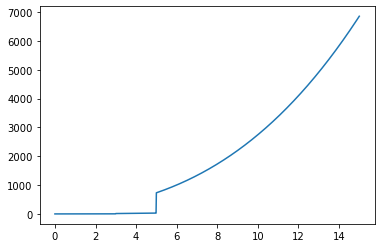

In [16]:
x = np.linspace(0, 15, 1000)
y = np.zeros(len(x))  # On crée un vecteur nul qu'on va remplir

for i in range(len(x)):  # i prendra les indices de 0 à len(x) - 1
  y[i] = fonction_morceau(x[i])  # On remplit l'élément d'indice i


"""On peut même le tracer"""
f, ax = plt.subplots()  # On ne va pas légender le graphique puisqu'il n'y a pas de contexte ici.
ax.plot(x, y)

plt.show()


## Utilisation de la compréhension des listes.
Une __liste en compréhension__ est une liste qui est obtenue par action (et/ou filtrage) de chaque élément d'une autre liste. La syntaxe est simple :

```python
L1 = [fonction(x) for x in L]  # L est une liste et L1 la nouvelle liste en compréhension
```

La syntaxe est assez clair : "Applique la `fonction` à `x` pour `x` qui parcourt chaque élément de `L`"

```{margin}
Ca fonction si `L` est un vecteur `numpy`

```

````{attention}
Cette méthode renvoie une liste __classique__, pas un vecteur `numpy`. Si vous voulez obtenir un vecteur numpy, il faudra utiliser la fonction `array` :
```python
L1 = np.array([fonction(x) for x in L])
```
````

A titre d'exemple :

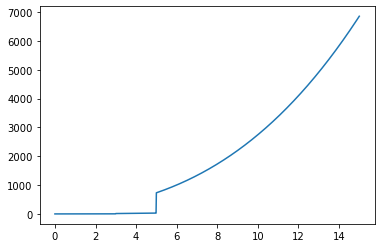

In [17]:
x = np.linspace(0, 15, 1000)
y = np.array([fonction_morceau(i) for i in x])


"""On peut même le tracer"""
f, ax = plt.subplots()  # On ne va pas légender le graphique puisqu'il n'y a pas de contexte ici.
ax.plot(x, y)

plt.show()


# Les dictionnaires
Les __dictionnaires__ sont des objets python un peu plus complexes que vous pourriez rencontrer comme retour d'une fonction native. Un dictionnaire, comme une liste possède un ensemble d'éléments (des entiers, flottants, chaine de caractère, listes, vecteur numpy ...) mais ces éléments sont rangés dans des _champs nommés_. Un exemple avec les différentes manipulations utiles :

In [18]:
""" On définit un dictionnaire. 
- Il a 4 champs : fruit, couleur, rouge, prix.
- On a assigner à ces champs les valeurs respectives : "Pomme", "Rouge", 234, 3.45

"""
a = {'fruit': "Pomme", 'couleur': "Rouge", 'nombre': 234, 'prix': 3.45}

b = a['fruit']  # Pour accéder au contenu du champ "fruit" du dictionnaire a

print('Nom des champs :')
for truc in a:  # truc prendra les différents nom des champs
  print(truc)  # On affiche le nom des champs

print('Contenu des champs :')
for truc in a:  # truc prendra les différents nom des champs
  print(a[truc])  # On affiche le contenu de chaque champ


Nom des champs :
fruit
couleur
nombre
prix
Contenu des champs :
Pomme
Rouge
234
3.45


```{tip}
Attention:
* Si `fruit` est le nom d'un champ, on écrit `a["fruit"]` avec des `""` : c'est bien une chaine de caractère
* Si `truc` est le nombre de la variable qui contient la chaine de caractère `"fruit"`, on écrit `a[truc]`
```

# Fonctions et méthodes
Vous avez peut-être remarqué que la façon d'appeler les "fonctions" pouvait un peu différer suivant les cas :
* `print(f)` : La __fonction__ `print` agit sur _l'argument_ `f` en l'affichant.
* `f.suptitle()` : la __méthode__  `suptitle` agit sur _l'objet_ `f` en le modifiant

On ne revient pas sur les fonctions qui ont déjà été présentées précédemment.

Les __méthodes__ sont comme des fonctions mais qui sont étroitement associées à certains types de variables (on parle d'objets). Cette notion est reliée à la __Programmation Orientée Objet__ (POO) rendue possibles par de nombreux langages informatiques (comme Python). 

Sans rentrer dans les détails, on peut en POO définir des _objets_ qui vont posséder certaines caractéristiques (des _attributs_) et certaines fonctions propres (des _méthodes_) qui permettent de les modifier ou d'obtenir certaines caractéristiques.

Par exemple, si je crée un vecteur numpy `v0` : c'est un objet. 
* Il possède certaines attributs. Ex : `shape` donnera sa taille. Pour obtenir cet attribut, on écrira `v0.shape` (l'attribut `shape` de l'objet `v0`)
* Il possède des méthodes. Ex : `fill(valeur)` remplit le vecteur avec la même `valeur`. Pour appliquer cette méthode à `v0`, on écrira `v0.fill(3)`.

Il n'est pas nécessaire de maîtriser complètement la POO. Il suffira surtout de repérer quand on utilise la syntaxe d'une fonction (ex : `round(3.4)`) et qu'on il s'agit de la syntaxe d'une méthode (ex : `ax.set_xlabel('Légende des x')`).